The USArrests data set. For each of the 50 states in the United States, the data set contains the number of arrests per 100, 000 residents for each of three crimes: Assault, Murder, and Rape. We also record UrbanPop (the percent of the population in each state living in urban areas).
1.   Kmeans for identifying the similar kind of states in crime 
2.   HC

1.   PCA
2.   Explained variance plot 

1.   Kmeans  using principal components
2.   HC using principal components

#**Import libraries**

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import scipy as sp
from sklearn.cluster import KMeans
import sklearn.preprocessing

In [2]:
import warnings   #ignore warnings
warnings.filterwarnings('ignore')

#**import data set**

In [4]:
data=pd.read_csv("USArrests.csv")

In [5]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.shape

(50, 5)

In [7]:
data=data.rename(columns={'Unnamed: 0':None})
data.index=data.iloc[:,0]
data=data.iloc[:,1:5]

In [8]:
data.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.5+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe58479cdd0>,
      dtype=object)

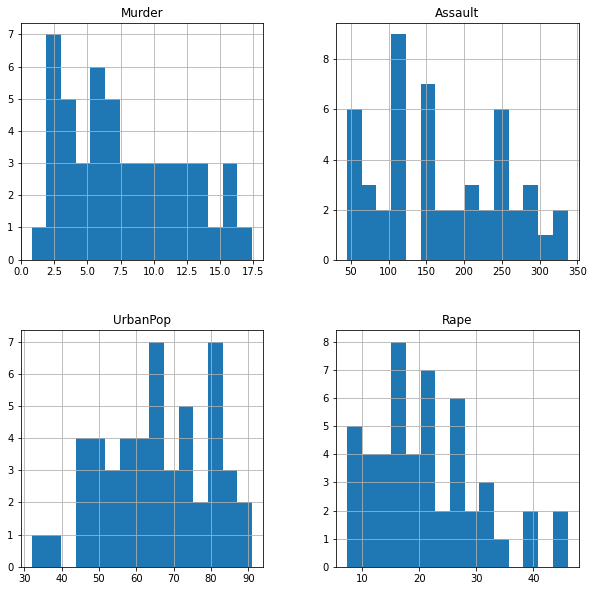

In [17]:
data.hist(bins=15,figsize=(10,10))

In [12]:
from sklearn.preprocessing import Normalizer
dataframe=pd.DataFrame(Normalizer().fit_transform(data),columns=data.columns,index=data.index)

In [14]:
dataframe.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.054031,0.966016,0.237411,0.086778
Alaska,0.036872,0.969739,0.176987,0.164081
Arizona,0.026439,0.959624,0.261122,0.101185
Arkansas,0.044528,0.961392,0.252998,0.098669
California,0.030657,0.940134,0.309972,0.138295


In [15]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,0.040677,0.015018,0.012626,0.027485,0.039406,0.049811,0.079346
Assault,50.0,0.881704,0.101645,0.473419,0.850453,0.907323,0.952031,0.989371
UrbanPop,50.0,0.409630,0.166944,0.132112,0.279234,0.395010,0.508929,0.854213
Rape,50.0,0.119341,0.035642,0.042620,0.092741,0.117441,0.139552,0.207893


#**K-Means Clustering**

In [18]:
from sklearn.cluster import KMeans

In [34]:
# Calculating WCSS (within-cluster sums of squares) 

wcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(dataframe)
    wcss.append(kmeans.inertia_)

In [35]:
wcss

[1.9452076233849003,
 0.7540963759591797,
 0.3278478050693132,
 0.22760245765174872,
 0.16395152491640727,
 0.12059896172575113,
 0.09861877942595958,
 0.08846696716061667,
 0.07526863777639684]

##**Elbow method for finding the optimum clusters**

Text(0, 0.5, 'WCSS')

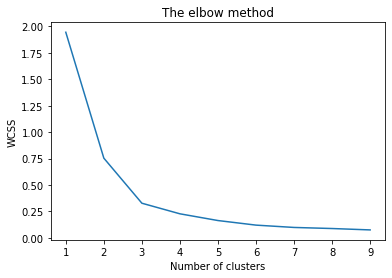

In [36]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

optimal k value is 3



In [37]:
# Model 
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=42)
kmeans.fit(dataframe)
k_clusters = kmeans.labels_

In [84]:
k_clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1], dtype=int32)

In [49]:
kc_df=dataframe.copy()
kc_df['Crime_Clusters']=k_clusters

In [50]:
kc_df.head(5)


,Murder,Assault,UrbanPop,Rape,Crime_Clusters
Alabama,0.054031,0.966016,0.237411,0.086778,1
Alaska,0.036872,0.969739,0.176987,0.164081,1
Arizona,0.026439,0.959624,0.261122,0.101185,1
Arkansas,0.044528,0.961392,0.252998,0.098669,1
California,0.030657,0.940134,0.309972,0.138295,1


In [51]:
kc_df.reset_index(level=0,inplace=True)

In [52]:
kc_df.head(5)

,index,Murder,Assault,UrbanPop,Rape,Crime_Clusters
0,Alabama,0.054031,0.966016,0.237411,0.086778,1
1,Alaska,0.036872,0.969739,0.176987,0.164081,1
2,Arizona,0.026439,0.959624,0.261122,0.101185,1
3,Arkansas,0.044528,0.961392,0.252998,0.098669,1
4,California,0.030657,0.940134,0.309972,0.138295,1


In [64]:
kc_df['Crime_Clusters'].unique()

array([1, 0, 2], dtype=int32)

In [55]:
kc_df=kc_df.rename(columns={'index':'State'})

In [56]:
kc_df.head(1)

,State,Murder,Assault,UrbanPop,Rape,Crime_Clusters
0,Alabama,0.054031,0.966016,0.237411,0.086778,1


###**Finding similar kind of States With respect to crime**

Sates Comes Under Cluster 0 

In [57]:
cluster0=kc_df.groupby('Crime_Clusters')['State'].unique()[0]

In [67]:
print('Sates Comes Under Cluster 0 :',cluster0)

Sates Comes Under Cluster 0 : ['Connecticut' 'Idaho' 'Indiana' 'Kansas' 'Kentucky' 'Maine'
 'Massachusetts' 'Montana' 'Nebraska' 'New Jersey' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Washington' 'West Virginia']


Sates Comes Under Cluster 1 

In [72]:
cluster_1=kc_df.groupby('Crime_Clusters')['State'].unique()[1]
print('Sates Comes Under Cluster 1 :',cluster_1)                                                            

Sates Comes Under Cluster 1 : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Delaware' 'Florida' 'Georgia' 'Illinois' 'Louisiana' 'Maryland'
 'Michigan' 'Mississippi' 'Missouri' 'Nevada' 'New Mexico' 'New York'
 'North Carolina' 'South Carolina' 'Tennessee' 'Texas' 'Virginia'
 'Wyoming']


Sates Comes Under Cluster 2

In [73]:
cluster_2=kc_df.groupby('Crime_Clusters')['State'].unique()[2]
print('Sates Comes Under Cluster 2 :',cluster_2)   

Sates Comes Under Cluster 2 : ['Hawaii' 'Iowa' 'Minnesota' 'New Hampshire' 'North Dakota' 'Wisconsin']


#**Hierarchical Clustering**

**1) Single Leakage:**

The distance between 2 clusters is defined as the shortest distance between points in the two clusters

In [74]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Euclidean distances')

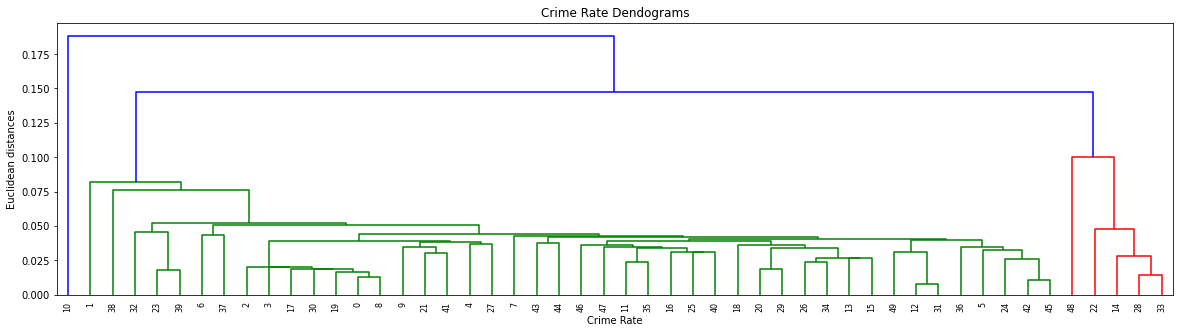

In [75]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(dataframe, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

**2) Complete Linkage**:

The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

Text(0, 0.5, 'Euclidean distances')

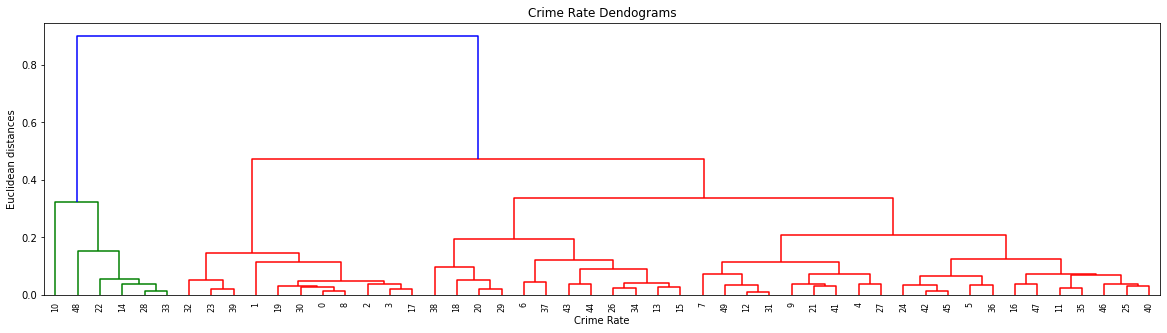

In [76]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(dataframe, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

**3) Average Linkage:**

The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Euclidean distances')

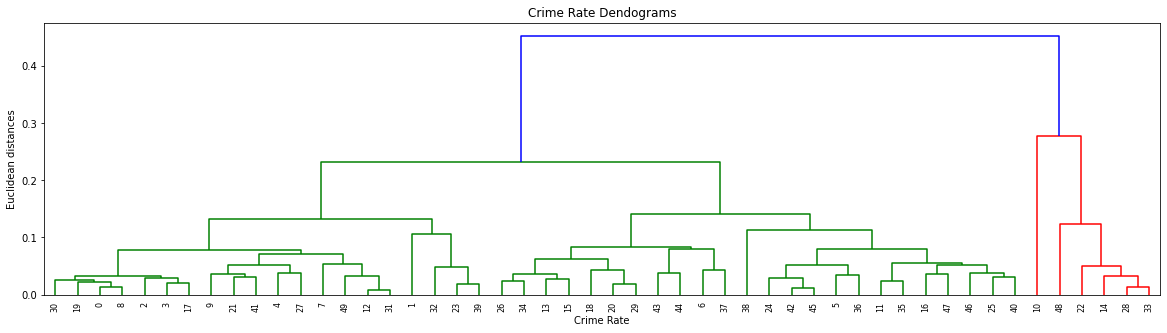

In [77]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(dataframe, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### **With Ward method**

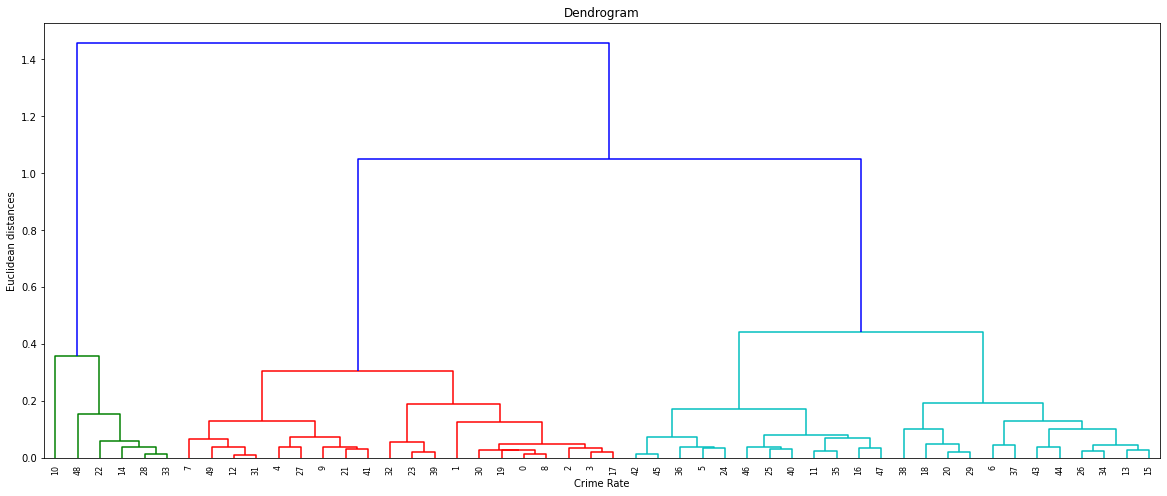

In [78]:

plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(dataframe, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

In [79]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [80]:
y_pred =AC.fit_predict(dataframe)
y_pred

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

In [81]:
# Fetch the cluster labels
kc_df['HC_Clusters']= y_pred

In [83]:
kc_df.head(10)

,State,Murder,Assault,UrbanPop,Rape,Crime_Clusters,HC_Clusters
0,Alabama,0.054031,0.966016,0.237411,0.086778,1,2
1,Alaska,0.036872,0.969739,0.176987,0.164081,1,2
2,Arizona,0.026439,0.959624,0.261122,0.101185,1,2
3,Arkansas,0.044528,0.961392,0.252998,0.098669,1,2
4,California,0.030657,0.940134,0.309972,0.138295,1,2
5,Colorado,0.035594,0.919142,0.351437,0.174367,1,0
6,Connecticut,0.024486,0.816202,0.571341,0.082362,0,0
7,Delaware,0.023674,0.954965,0.288897,0.063397,1,2
8,Florida,0.044478,0.967547,0.231056,0.092134,1,2
9,Georgia,0.078534,0.952332,0.270805,0.116446,1,2


In [97]:
Hc_clstr0=kc_df.groupby('HC_Clusters')['State'].unique()[0]
print('Sates Comes Under Cluster 0 :',Hc_clstr0)   

Sates Comes Under Cluster 0 : ['Colorado' 'Connecticut' 'Idaho' 'Indiana' 'Kansas' 'Kentucky' 'Maine'
 'Massachusetts' 'Missouri' 'Montana' 'Nebraska' 'New Jersey' 'Ohio'
 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Texas'
 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia']


In [99]:
Hc_clstr1=kc_df.groupby('HC_Clusters')['State'].unique()[1]
print('Sates Comes Under Cluster 1 :',Hc_clstr1) 

Sates Comes Under Cluster 1 : ['Hawaii' 'Iowa' 'Minnesota' 'New Hampshire' 'North Dakota' 'Wisconsin']


In [100]:
Hc_clstr2=kc_df.groupby('HC_Clusters')['State'].unique()[2]
print('Sates Comes Under Cluster 2 :',Hc_clstr2)

Sates Comes Under Cluster 2 : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Delaware' 'Florida'
 'Georgia' 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Wyoming']


#**PCA**

In [115]:
dataframe.shape

(50, 4)

In [116]:
from sklearn.preprocessing import StandardScaler
#define scaler
scaler = StandardScaler()

In [117]:
#create copy of DataFrame
scaled_df=dataframe.copy()

In [118]:
#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [119]:
scaled_df.head()

,Murder,Assault,UrbanPop,Rape
0,0.898229,0.837890,-1.042073,-0.922900
1,-0.255938,0.874891,-1.407689,1.268035
2,-0.957724,0.774367,-0.898599,-0.514574
3,0.258983,0.791936,-0.947758,-0.585873
4,-0.674017,0.580679,-0.603018,0.537204


In [120]:
from sklearn.decomposition import PCA

In [121]:
#define PCA model to use
pca = PCA(n_components=4)

In [122]:
#fit PCA model to data
pca_fit = pca.fit(scaled_df)

#**Create the Scree Plot**

we’ll calculate the percentage of total variance explained by each principal component and use matplotlib to create a scree plot:

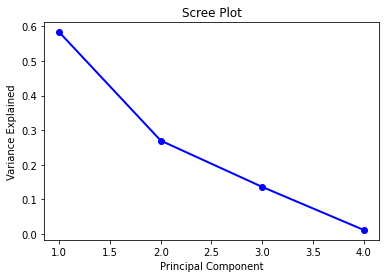

In [123]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The x-axis displays the principal component and the y-axis displays the percentage of total variance explained by each individual principal component.

We can also use the following code to display the exact percentage of total variance explained by each principal component:

In [124]:
print(pca.explained_variance_ratio_)

[0.5829407  0.2696689  0.13585957 0.01153083]


We can see:

The first principal component explains 58.29.01% of the total variation in the dataset.

The second principal component explains 26.96% of the total variation.

The third principal component explains 13.59% of the total variation.

The fourth principal component explains 1.153% of the total variation.

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

In [138]:
print(f'Number of Principal Components to explain 95% variance = {pca.n_components_}')

Number of Principal Components to explain 95% variance = 3


#**Explained Variance**

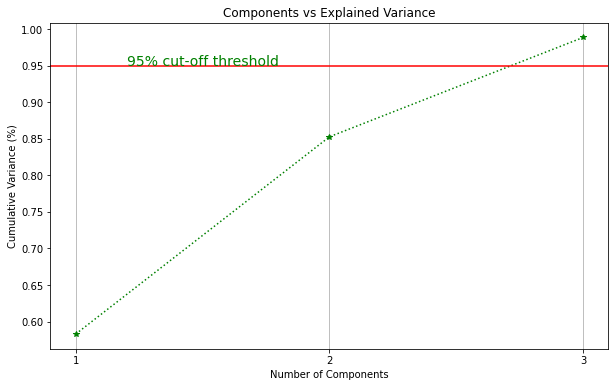

In [139]:
plt.figure(figsize = (10, 6))
x = np.arange(1, pca.n_components_+1 , step = 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y, marker = "*", linestyle = "dotted", color = "g")
# horizontal line for 95% cutoff threshold
plt.axhline(y = 0.95, color = 'r', linestyle = "-")
plt.text(1.2, 0.95, "95% cut-off threshold", color = 'g', fontsize = 14)
plt.xticks(x)
plt.grid(axis = 'x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title("Components vs Explained Variance")
plt.show()

#**KMeans with Principal Components**

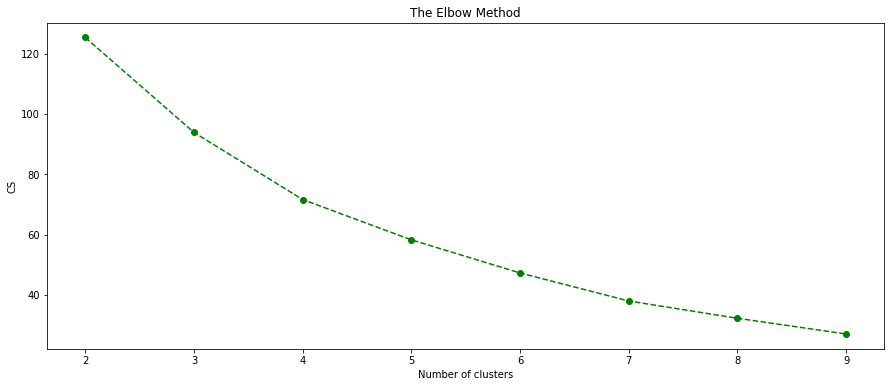

In [153]:
cs = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_df)
    cs.append(kmeans.inertia_)
plt.figure(figsize = (15, 6))   
plt.plot(range(2, 10), cs,color='green',linestyle='dashed',marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [154]:
#k=4

# Model 
kmeans_pca = KMeans(n_clusters=4, init = "k-means++", random_state=42)
kmeans_pca.fit(pca_df)
kmean_clusters_pca = kmeans_pca.labels_

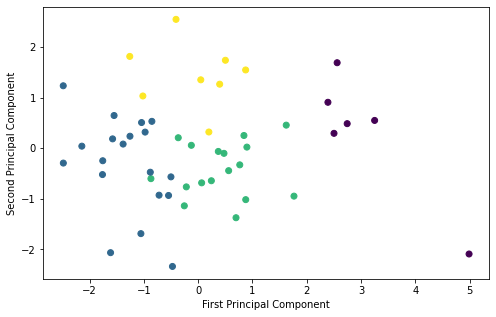

In [157]:
# plotting the PCA components
plt.figure(figsize =(8, 5))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c = kmean_clusters_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [158]:

kc_df["pca-kmeans-cluster"] = kmean_clusters_pca


In [159]:
kc_df.head(5)

,State,Murder,Assault,UrbanPop,Rape,Crime_Clusters,HC_Clusters,pca-kmeans-cluster
0,Alabama,0.054031,0.966016,0.237411,0.086778,1,2,1
1,Alaska,0.036872,0.969739,0.176987,0.164081,1,2,2
2,Arizona,0.026439,0.959624,0.261122,0.101185,1,2,3
3,Arkansas,0.044528,0.961392,0.252998,0.098669,1,2,1
4,California,0.030657,0.940134,0.309972,0.138295,1,2,2


#**Agglomerative Clustering with PCA**

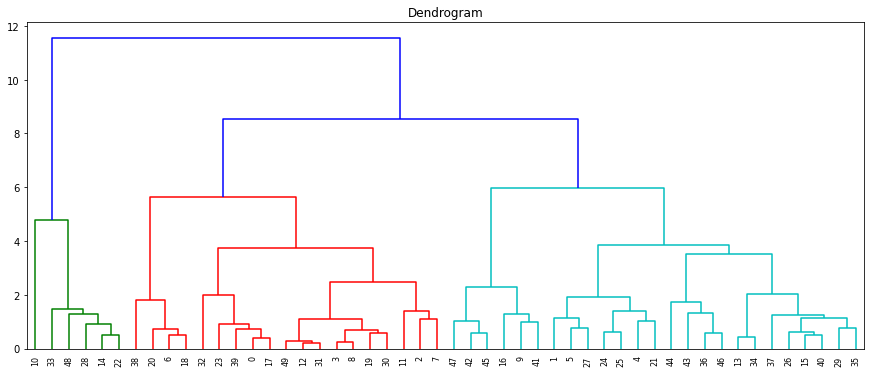

In [160]:
plt.figure(figsize = (15, 6))
plt.title("Dendrogram")
dendo = sch.dendrogram(sch.linkage(pca_df, method = "ward"))

In [161]:
#No of clusters=4

# Fit the Agglomerative Clustering with PCA
 
AC_PCA = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [162]:
y_pred_pca =AC.fit_predict(pca_df)
y_pred_pca

array([2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2])

In [163]:
# Fetch the HC-PCA cluster label 
kc_df['HC_PCA_Clusters']= y_pred_pca

In [164]:
kc_df.head(5)

,State,Murder,Assault,UrbanPop,Rape,Crime_Clusters,HC_Clusters,pca-kmeans-cluster,HC_PCA_Clusters
0,Alabama,0.054031,0.966016,0.237411,0.086778,1,2,1,2
1,Alaska,0.036872,0.969739,0.176987,0.164081,1,2,2,0
2,Arizona,0.026439,0.959624,0.261122,0.101185,1,2,3,2
3,Arkansas,0.044528,0.961392,0.252998,0.098669,1,2,1,2
4,California,0.030657,0.940134,0.309972,0.138295,1,2,2,0


In [165]:
kcd=kc_df.copy()

In [172]:
HC_PCA = kcd.reset_index().groupby("HC_PCA_Clusters")["State"].apply(list)

In [173]:
HC_PCA.head(5)

HC_PCA_Clusters
0    [Alaska, California, Colorado, Georgia, Indian...
1    [Hawaii, Iowa, Minnesota, New Hampshire, North...
2    [Alabama, Arizona, Arkansas, Connecticut, Dela...
Name: State, dtype: object

In [174]:
for x in HC_PCA:
    print(x)

['Alaska', 'California', 'Colorado', 'Georgia', 'Indiana', 'Kansas', 'Kentucky', 'Michigan', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia']
['Hawaii', 'Iowa', 'Minnesota', 'New Hampshire', 'North Dakota', 'Wisconsin']
['Alabama', 'Arizona', 'Arkansas', 'Connecticut', 'Delaware', 'Florida', 'Idaho', 'Illinois', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Mexico', 'New York', 'North Carolina', 'Rhode Island', 'South Carolina', 'Wyoming']
